<a href="https://colab.research.google.com/github/marianoInsa/ONE-TelecomX/blob/main/Challenge-TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración del Entorno

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

sns.set_theme()

# Fase 1: Extracción (Extract)

In [48]:
def extraer_datos(url: str) -> pd.DataFrame | None:
    """
    Descarga los datos desde la API y devuelve un DataFrame.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()

        data = json.loads(response.text)

        df = pd.DataFrame(data)
        print(f"✅ Datos extraídos con éxito. \nDimensiones: {df.shape}")
        return df
    except Exception as e:
        print(f"❌ Error en extracción: {e}")
        return None


In [49]:
raw_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

raw_df = extraer_datos(raw_url)

✅ Datos extraídos con éxito. 
Dimensiones: (7267, 6)


## Conociendo el Data Set

In [50]:
raw_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   str   
 1   Churn       7267 non-null   str   
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(4), str(2)
memory usage: 340.8+ KB


In [51]:
raw_df.dtypes

customerID       str
Churn            str
customer      object
phone         object
internet      object
account       object
dtype: object

In [52]:
raw_df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [53]:
raw_df.tail()

,customerID,Churn,customer,phone,internet,account
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7266,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [54]:
raw_df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,0002-ORFBO,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


# Fase 2: Transformación (Transform)

## Limpieza Estructural

### Normalización

In [55]:
def normalizar_datos(df: pd.DataFrame, column_names: list) -> pd.DataFrame | None:
    """
    Normaliza los datos en las columnas especificadas y devuelve un nuevo DataFrame.
    Reemplaza puntos por guiones bajos y convierte nombres a minúsculas (snake_case).
    """
    try:
        missing_cols = [col for col in column_names if col not in df.columns]
        if missing_cols:
            print(f"❌ Columnas no encontradas: {missing_cols}")
            return None
        
        # columnas que no se van a normalizar
        non_nested_cols = [col for col in df.columns if col not in column_names]
        normalized_df = df[non_nested_cols].copy()

        for column_name in column_names:
            # normaliza la columna
            normalized_segment = pd.json_normalize(df[column_name])

            # agregar prefijos y limpiar nombres
            normalized_segment.columns = [
                f"{column_name}_{col}".replace('.', '_').lower() 
                for col in normalized_segment.columns
            ]

            # alinear índices
            normalized_segment.index = normalized_df.index

            # concatenar el segmento normalizado con el df principal
            normalized_df = pd.concat([normalized_df, normalized_segment], axis=1)

        print(f"✅ Datos normalizados con éxito. \nDimensiones: {normalized_df.shape}")
        return normalized_df
    except Exception as e:
        print(f"❌ Error en normalización: {e}")
        return None


In [56]:
normalized_df = normalizar_datos(raw_df, ["customer", "phone", "internet", "account"])

✅ Datos normalizados con éxito. 
Dimensiones: (7267, 21)


In [57]:
normalized_df.head()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Manejo de Tipos

In [58]:
normalized_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [59]:
normalized_df.dtypes

customerID                       str
Churn                            str
customer_gender                  str
customer_seniorcitizen         int64
customer_partner                 str
customer_dependents              str
customer_tenure                int64
phone_phoneservice               str
phone_multiplelines              str
internet_internetservice         str
internet_onlinesecurity          str
internet_onlinebackup            str
internet_deviceprotection        str
internet_techsupport             str
internet_streamingtv             str
internet_streamingmovies         str
account_contract                 str
account_paperlessbilling         str
account_paymentmethod            str
account_charges_monthly      float64
account_charges_total            str
dtype: object

El campo "account_charges_total" es de tipo "str", pero debería ser "float64"

In [60]:
def reemplazar_espacios_en_blanco(df: pd.DataFrame, column_name: str, string: str = None) -> pd.DataFrame | None:
    """
    Reemplaza las espacios en blanco en una columna con un string dado o NaN.
    """
    if df is None:
        print(f"❌ Error: El DataFrame de entrada es None.")
        return None

    df_copy = df.copy()

    if string is None:
        df_copy[column_name] = df_copy[column_name].replace(' ', np.nan)
        print(f"✅ espacios en blanco reemplazadas con NaN en la columna '{column_name}'.")

    else:
        df_copy[column_name] = df_copy[column_name].replace(' ', string)
        print(f"✅ espacios en blanco reemplazadas con '{string}' en la columna '{column_name}'.")

    return df_copy

In [61]:
def convertir_tipo_columna(df: pd.DataFrame, column_name: str, new_type: type) -> pd.DataFrame | None:
    """
    Convierte el tipo de una columna específica en un nuevo tipo.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None

        # primero elimino espacios en blanco
        # si 'new_type' es decimal, el string es '0.0'
        df = reemplazar_espacios_en_blanco(df, column_name, '0.0')

        if df is None:
            print(f"❌ Error en conversión de tipo: reemplazar_espacios_en_blanco devolvió None.")
            return None

        # convertir columna a numerico, convirtiendo los errores a NaN
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

        # convertir al nuevo tipo específico
        df[column_name] = df[column_name].astype(new_type)

        print(f"✅ Tipo de columna '{column_name}' convertido a '{new_type}'.")
        return df

    except Exception as e:
        print(f"❌ Error en conversión de tipo: {e}")
        return None

In [62]:
normalized_df = convertir_tipo_columna(normalized_df, "account_charges_total", np.float64)

✅ espacios en blanco reemplazadas con '0.0' en la columna 'account_charges_total'.
✅ Tipo de columna 'account_charges_total' convertido a '<class 'numpy.float64'>'.


In [63]:
normalized_df.info(verbose=True)

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [64]:
normalized_df.dtypes

customerID                       str
Churn                            str
customer_gender                  str
customer_seniorcitizen         int64
customer_partner                 str
customer_dependents              str
customer_tenure                int64
phone_phoneservice               str
phone_multiplelines              str
internet_internetservice         str
internet_onlinesecurity          str
internet_onlinebackup            str
internet_deviceprotection        str
internet_techsupport             str
internet_streamingtv             str
internet_streamingmovies         str
account_contract                 str
account_paperlessbilling         str
account_paymentmethod            str
account_charges_monthly      float64
account_charges_total        float64
dtype: object

In [65]:
normalized_df.head()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Manejo de nulos

In [66]:
normalized_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [67]:
normalized_df.isna().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64

In [68]:
def eliminar_nulos(df: pd.DataFrame, column_name: str) -> pd.DataFrame | None:
    """
    Elimina los registros con valores nulos en una columna específica.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None
        
        nulos = df[column_name].isna().sum()
        if nulos == 0:
            print(f"✅ No hay registros nulos en la columna '{column_name}'.")
            return df

        print(f"ℹ️ Registros nulos en la columna '{column_name}': {nulos}")


        # reemplazo los nulos por "0.0"
        df[column_name] = df[column_name].fillna("0.0")

        # transformo los datos a float64
        df[column_name] = df[column_name].astype(np.float64)

        print(f"✅ Registros nulos en la columna '{column_name}' eliminados.")
        return df
    except Exception as e:
        print(f"❌ Error en eliminación de nulos: {e}")
        return None

In [69]:
normalized_df = eliminar_nulos(normalized_df, "account_charges_total")
normalized_df.isna().sum()

✅ No hay registros nulos en la columna 'account_charges_total'.


customerID                   0
Churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64

In [70]:
normalized_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   str    
 1   Churn                      7267 non-null   str    
 2   customer_gender            7267 non-null   str    
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   str    
 5   customer_dependents        7267 non-null   str    
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   str    
 8   phone_multiplelines        7267 non-null   str    
 9   internet_internetservice   7267 non-null   str    
 10  internet_onlinesecurity    7267 non-null   str    
 11  internet_onlinebackup      7267 non-null   str    
 12  internet_deviceprotection  7267 non-null   str    
 13  internet_techsupport       7267 non-null   str    
 14  int

In [71]:
normalized_df.tail()

,customerID,Churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


## Validación y Estandarización del Contenido

### Validación: Valores Únicos

In [72]:
def verificar_valores_unicos(df: pd.DataFrame) -> None:
    """
    Verifica si hay valores únicos en un DataFrame
    Salida: Columna: [valores únicos]
    """
    for column in df.columns:
        unique_values = df[column].unique()
        # imprime los valores entre comillas
        print(f"Columna: {column} | Valores únicos: {', '.join(map(str, unique_values))}")
        print()

verificar_valores_unicos(normalized_df)


Columna: customerID | Valores únicos: 0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKFF, 0013-EXCHZ, 0013-MHZWF, 0013-SMEOE, 0014-BMAQU, 0015-UOCOJ, 0016-QLJIS, 0017-DINOC, 0017-IUDMW, 0018-NYROU, 0019-EFAEP, 0019-GFNTW, 0020-INWCK, 0020-JDNXP, 0021-IKXGC, 0022-TCJCI, 0023-HGHWL, 0023-UYUPN, 0023-XUOPT, 0027-KWYKW, 0030-FNXPP, 0031-PVLZI, 0032-PGELS, 0036-IHMOT, 0040-HALCW, 0042-JVWOJ, 0042-RLHYP, 0047-ZHDTW, 0048-LUMLS, 0048-PIHNL, 0052-DCKON, 0052-YNYOT, 0056-EPFBG, 0057-QBUQH, 0058-EVZWM, 0060-FUALY, 0064-SUDOG, 0064-YIJGF, 0067-DKWBL, 0068-FIGTF, 0071-NDAFP, 0074-HDKDG, 0076-LVEPS, 0078-XZMHT, 0080-EMYVY, 0080-OROZO, 0082-LDZUE, 0082-OQIQY, 0083-PIVIK, 0089-IIQKO, 0093-EXYQL, 0093-XWZFY, 0094-OIFMO, 0096-BXERS, 0096-FCPUF, 0098-BOWSO, 0100-DUVFC, 0103-CSITQ, 0104-PPXDV, 0106-GHRQR, 0106-UGRDO, 0107-WESLM, 0107-YHINA, 0111-KLBQG, 0112-QAWRZ, 0112-QWPNC, 0114-IGABW, 0114-PEGZZ, 0114-RSRRW, 0115-TFERT, 0117-LFRMW, 0118-JPNOY, 0120-YZLQA, 0121-SNYRK, 0122-OAHPZ, 0123-CRBRT, 0125-LZQXK, 01

In [73]:
normalized_df['Churn'].unique()

<StringArray>
['No', 'Yes', '']
Length: 3, dtype: str

Se detectaron valores inconsistentes en la columna "Churn"

**Fundamentación:** El valor vacío _''_ en la columna 'Churn' es un problema crítico: si no sabemos si el cliente se fue o se quedó, esa fila no sirve para entrenar un modelo predictivo.

In [74]:
def limpiar_valores_invalidos(df: pd.DataFrame, column_name: str, valid_values: list, drop_invalid: bool = True) -> pd.DataFrame:
    """
    Limpia valores inválidos de una columna.
    """
    # identificar valores inválidos (strings vacíos y valores fuera del conjunto válido)
    invalid_mask = (
        (df[column_name].astype(str).str.strip() == '') | 
        (~df[column_name].isin(valid_values))
    )
    
    invalid_count = invalid_mask.sum()
    
    if invalid_count == 0:
        print(f"✅ No se encontraron valores inválidos en '{column_name}'")
        return df
    
    print(f"⚠️ Se detectaron {invalid_count} valores inválidos en '{column_name}'")
    
    if drop_invalid:
        # eliminar filas con valores inválidos
        cleaned_df = df[~invalid_mask].copy()
        print(f"✅ Filas eliminadas. Dimensiones: {df.shape} → {cleaned_df.shape}")
    else:
        # reemplazar valores inválidos con NaN
        cleaned_df = df.copy()
        cleaned_df.loc[invalid_mask, column_name] = np.nan
        print(f"✅ Valores inválidos reemplazados con NaN")
    
    return cleaned_df


In [75]:
# definir valores válidos para la columna 'Churn'
valid_churn_values = ['No', 'Yes']

# limpiar valores inconsistentes
validated_df = limpiar_valores_invalidos(
    df=normalized_df, 
    column_name='Churn', 
    valid_values=valid_churn_values, 
    drop_invalid=True
)


⚠️ Se detectaron 224 valores inválidos en 'Churn'
✅ Filas eliminadas. Dimensiones: (7267, 21) → (7043, 21)


In [76]:
# Verificar resultado
validated_df['Churn'].unique()


<StringArray>
['No', 'Yes']
Length: 2, dtype: str

### Estandarización: Conversión de Texto a Binario

In [77]:
def mapear_a_binario(df: pd.DataFrame, column_name: str, mapping: dict = None) -> pd.DataFrame:
    """
    Mapea valores textuales a valores binarios.
    """
    if df is None:
        print(f"❌ Error: El DataFrame de entrada es None.")
        return None
    
    if mapping is None:
        mapping = {'Yes': 1, 'No': 0} # mapeo por defecto
    
    transformed_df = df.copy()
    
    transformed_df[column_name] = transformed_df[column_name].map(mapping)
    
    unmapped_count = transformed_df[column_name].isna().sum()
    if unmapped_count > 0:
        print(f"⚠️ Advertencia: {unmapped_count} valores no se pudieron mapear en '{column_name}'")
        
    else:
        print(f"✅ Mapeo exitoso en '{column_name}': {mapping}")
        print(f"Valores únicos resultantes: {sorted(transformed_df[column_name].unique())}")
    
    return transformed_df

#### Columna 'Churn'

In [78]:
transformed_df = mapear_a_binario(
    df=validated_df, 
    column_name='Churn', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'Churn': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'customer_partner'

In [79]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='customer_partner', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'customer_partner': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'customer_dependents'

In [80]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='customer_dependents', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'customer_dependents': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


#### Columna 'phone_phoneservice'

In [81]:
transformed_df = mapear_a_binario(
    df=transformed_df, 
    column_name='phone_phoneservice', 
    mapping={'Yes': 1, 'No': 0}
)

✅ Mapeo exitoso en 'phone_phoneservice': {'Yes': 1, 'No': 0}
Valores únicos resultantes: [np.int64(0), np.int64(1)]


## Crear la columna "Cuentas_Diarias"

Utilizar la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [82]:
def crear_columna_cuentas_diarias(df: pd.DataFrame, monthly_column: str, new_column: str = 'Cuentas_Diarias', days_per_month: float = 30.0) -> pd.DataFrame:
    """
    Calcula el valor diario a partir de la facturación mensual.
    """
    try:
        if df is None:
            print(f"❌ Error: El DataFrame de entrada es None.")
            return None
        
        if monthly_column not in df.columns:
            print(f"❌ Error: La columna '{monthly_column}' no existe en el DataFrame.")
            return None

        df_with_daily = df.copy()
        
        # calcular facturación diaria
        df_with_daily[new_column] = df_with_daily[monthly_column] / days_per_month
        
        # redondear a 2 decimales
        df_with_daily[new_column] = df_with_daily[new_column].round(2)
        
        print(f"✅ Columna '{new_column}' creada exitosamente.")
        print(f"Basada en: {monthly_column} / {days_per_month} días")
        print(f"Rango de valores diarios: ${df_with_daily[new_column].min():.2f} - ${df_with_daily[new_column].max():.2f}")
        
        return df_with_daily
    
    except Exception as e:
        print(f"❌ Error al crear columna de cuentas diarias: {e}")
        return None


In [83]:
transformed_df = crear_columna_cuentas_diarias(
    df=transformed_df,
    monthly_column='account_charges_monthly',
    new_column='cuentas_diarias',
    days_per_month=30.0
)

✅ Columna 'cuentas_diarias' creada exitosamente.
Basada en: account_charges_monthly / 30.0 días
Rango de valores diarios: $0.61 - $3.96


In [84]:
# Verificar la nueva columna
transformed_df[['account_charges_monthly', 'cuentas_diarias']].head(10)

,account_charges_monthly,cuentas_diarias
0,65.60,2.19
1,59.90,2.00
2,73.90,2.46
3,98.00,3.27
4,83.90,2.80
5,69.40,2.31
6,109.70,3.66
7,84.65,2.82
8,48.20,1.61
9,90.45,3.02


# Fase 3: Carga y EDA (Load & Analysis)

## Cargar los Datos

In [85]:
def cargar_datos(format: str, cleaned_df: pd.DataFrame, path: str):
    """
    Guarda los datos listos para el análisis.
    """
    if format == 'csv':
        cleaned_df.to_csv(path, index=False)
    elif format == 'excel':
        cleaned_df.to_excel(path, index=False)
    elif format == 'json':
        cleaned_df.to_json(path, index=False)
    elif format == 'html':
        cleaned_df.to_html(path, index=False)
    elif format == 'xml':
        cleaned_df.to_xml(path, index=False)
    else:
        print(f"❌ Formato '{format}' no soportado.")
        return
    print(f"✅ Datos guardados en {path}")

In [86]:
cargar_datos("csv", transformed_df, "telecom_data_processed.csv")

✅ Datos guardados en telecom_data_processed.csv


In [87]:
df = pd.read_csv("telecom_data_processed.csv")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   str    
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   str    
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   str    
 9   internet_internetservice   7043 non-null   str    
 10  internet_onlinesecurity    7043 non-null   str    
 11  internet_onlinebackup      7043 non-null   str    
 12  internet_deviceprotection  7043 non-null   str    
 13  internet_techsupport       7043 non-null   str    
 14  int

## Análisis Descriptivo

### Distribución de los Datos

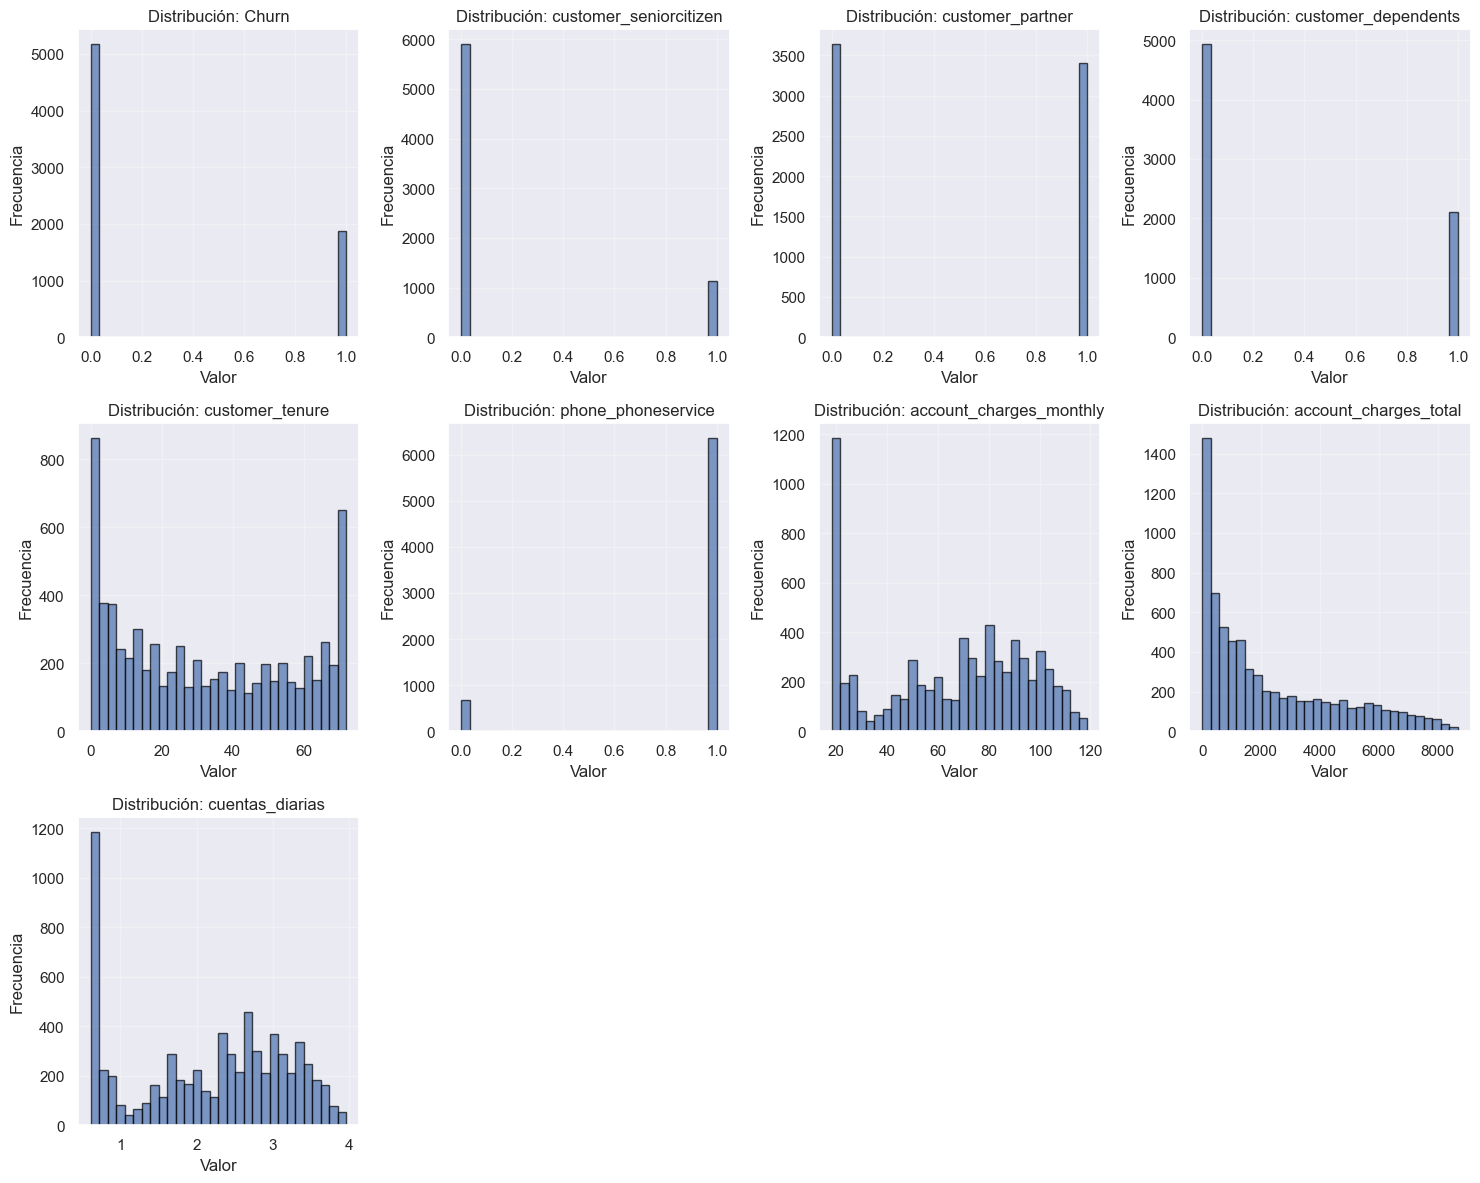

In [125]:
def visualizar_distribucion(df: pd.DataFrame) -> None:
    """
    Crea visualizaciones de la distribución de datos.
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # crear subplots
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución: {col}')
        axes[idx].set_xlabel('Valor')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)
    
    # ocultar ejes no usados
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

visualizar_distribucion(df)

#### Conclusiones del Gráfico de Distribución

Del análisis de los histogramas de distribución se observa:

- La mayoría de variables muestran **distribuciones asimétricas sesgadas a la derecha**, lo que indica que hay concentración de valores bajos con colas largas hacia valores altos.
- Las columnas `account_charges_monhtly`, `account_charges_total` y `cuentas_diarias` presentan una **dispersión significativa**, indicando heterogeneidad en el gasto de los clientes.
- Algunas variables numéricas (las que anteriormente hemos transformado de "Yes"/"No" a 1/0) presentan **_outliers_ (valores extremos)** que podrían requerir tratamiento especial en modelos de Machine Learning.


### Estadísticas Descriptivas

Media, mediana, desviación estándar y cuartiles.

In [110]:
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00
customer_seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
customer_partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
customer_dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
customer_tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phone_phoneservice,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
account_charges_monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
account_charges_total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
cuentas_diarias,7043.0,2.158675,1.003088,0.61,1.18,2.34,2.99,3.96


Las diferencias entre media y mediana indican distribuciones asimétricas. En columnas donde la media es mayor que la mediana, significa que hay valores altos que tiran la media hacia arriba.

Esto es crucial para ML, ya que algunos algoritmos son sensibles a _outliers_, por lo que la mediana puede ser más robusta.

#### Skewness (Asimetría)

Es una medida de la **asimetría** de la distribución de probabilidad de una variable aleatoria de valor real en torno a su media. Mide hacia dónde se inclina la "joroba" de los datos.

- **0:** Simétrica (Normal).
- **Positiva (>0):** Cola larga a la derecha (la mayoría de los datos son pequeños).
- **Negativa (<0):** Cola larga a la izquierda (la mayoría de los datos son altos).

Es crucial porque muchos algoritmos de Machine Learning (como la regresión lineal) asumen que los datos siguen una distribución normal; si están muy sesgados, el modelo puede perder precisión.

> Nota: En variables binarias (0 y 1), la asimetría nos dice qué tan desbalanceadas están las clases.

In [121]:
stats['skewness'] = df.select_dtypes(include=[np.number]).skew()
stats['skewness']

Churn                      1.063031
customer_seniorcitizen     1.833633
customer_partner           0.067922
customer_dependents        0.875199
customer_tenure            0.239540
phone_phoneservice        -2.727153
account_charges_monthly   -0.220524
account_charges_total      0.963235
cuentas_diarias           -0.220524
Name: skewness, dtype: float64

#### Kurtosis (Curtosis)

Es una medida de si las colas de la distribución son pesadas (>0) o ligeras (<0) en comparación con una distribución normal. Indica la presencia de _outliers_ (valores extremos) en comparación con una distribución normal. Mide qué tan "picuda" o "plana" es la distribución comparada con una normal.

- **Negativa:** Plana (Platicúrtica). Los datos están muy dispersos.
- **Positiva:** Picuda (Leptocúrtica). Los datos se concentran mucho en el centro con colas pesadas.

Es una medida importante, ya que nos ayuda a evaluar la forma de la distribución de los datos más allá de medidas simples como la media y la varianza.

In [122]:
stats['kurtosis'] = df.select_dtypes(include=[np.number]).kurtosis()
stats['kurtosis']

Churn                     -0.870211
customer_seniorcitizen     1.362596
customer_partner          -1.995953
customer_dependents       -1.234378
customer_tenure           -1.387372
phone_phoneservice         5.438908
account_charges_monthly   -1.257260
account_charges_total     -0.228580
cuentas_diarias           -1.257155
Name: kurtosis, dtype: float64

#### Coeficiente de Variación

Es una medida de qué tan grande es la desviación estándar en comparación con la media. Mide qué tan dispersos están los datos en relación con su promedio ($\sigma / \mu$). Un CV alto indica mucha variabilidad (datos poco homogéneos).

Tiene la finalidad de permitirnos comparar la **variabilidad** de dos variables que tienen unidades o escalas diferentes.

In [123]:
numericas = df.select_dtypes(include=[np.number])
stats['cv'] = (numericas.std() / numericas.mean() * 100).round(2)
stats['cv']

Churn                      166.39
customer_seniorcitizen     227.33
customer_partner           103.46
customer_dependents        152.91
customer_tenure             75.87
phone_phoneservice          32.75
account_charges_monthly     46.46
account_charges_total       99.43
cuentas_diarias             46.47
Name: cv, dtype: float64

In [133]:
stats[['skewness', 'kurtosis', 'cv']]

,skewness,kurtosis,cv
Churn,1.063031,-0.870211,166.39
customer_seniorcitizen,1.833633,1.362596,227.33
customer_partner,0.067922,-1.995953,103.46
customer_dependents,0.875199,-1.234378,152.91
customer_tenure,0.239540,-1.387372,75.87
phone_phoneservice,-2.727153,5.438908,32.75
account_charges_monthly,-0.220524,-1.257260,46.46
account_charges_total,0.963235,-0.228580,99.43
cuentas_diarias,-0.220524,-1.257155,46.47


### Conclusiones de las Estadísticas Descriptivas

#### 1. Desbalance

El dataset tiene desbalance en el target (`Churn`), lo que complicará la predicción de los que se van. La mayoría de los clientes se quedan (skew > 1), por lo que el desbalance es moderado/alto. La clase minoritaria (los que hacen churn) es pequeña respecto al total (CV 166%), lo que genera mucha variabilidad relativa.

#### 2. Sesgos Demográficos

La variable más desbalanceada demográficamente es `SeniorCitizen`, y nos dice que los datos representan mayoritariamente a gente joven (skew > 1 y CV 227%). El modelo podría comportarse mal prediciendo churn en ancianos por falta de datos.

#### 3. Comportamiento del Cliente

La variable `tenure` a primera vista parece simétrica (skew = 0), pero la distribución es plana (kurtosis < 0). Por lo tanto, se tienes un grupo grande de clientes nuevos (tenure bajo) y un grupo grande de clientes muy fieles (tenure alto), con gente distribuida en el medio. O se van rápido o se quedan por años.

## Distribución de la Variable `Churn`

Esta sección consiste en comprender la distribución de la variable `Churn` (evasión) entre los clientes de **TelecomX**. Se analiza la proporción de clientes que permanecieron contra los que se dieron de baja mediante diferentes tipos de gráficos.

### Análisis Estadístico de `Churn`

#### Conteos y Porcentajes

In [186]:
# Conteos absolutos
def calcular_conteo_churn(df: pd.DataFrame, verbose: bool = False) -> pd.Series:
    """
    Calcula el conteo de clientes que han hecho churn y los que no.
    """
    churn_counts = df['Churn'].value_counts().sort_index()
    if verbose:
        print(f"Conteo de Churn: {churn_counts}")
    return churn_counts

churn_counts = calcular_conteo_churn(df)

In [178]:
print(f"Total de Clientes: {len(df):,}")
print(f"✅ Clientes sin Churn: {churn_counts.get(0, 0):,}")
print(f"❌ Clientes con Churn: {churn_counts.get(1, 0):,}")

Total de Clientes: 7,043
✅ Clientes sin Churn: 5,174
❌ Clientes con Churn: 1,869


In [187]:
# Porcentajes
def calcular_porcentaje_churn(df: pd.DataFrame, verbose: bool = False) -> pd.Series:
    """
    Calcula el porcentaje de clientes que han hecho churn y los que no.
    """
    churn_pct = df['Churn'].value_counts(normalize=True).sort_index() * 100
    if verbose:
        print(f"Porcentaje de Churn:\n{churn_pct}")
    return churn_pct

churn_pct = calcular_porcentaje_churn(df)

In [188]:
print(f"✅ Clientes sin Churn: {churn_pct.get(0, 0):.2f}%")
print(f"❌ Clientes con Churn: {churn_pct.get(1, 0):.2f}%")

✅ Clientes sin Churn: 73.46%
❌ Clientes con Churn: 26.54%


#### Churn Rate y Retention Rate

_Churn Rate:_ Mide el porcentaje de clientes perdidos en un periodo, reflejando insatisfacción o fallas en la retención.

$$\text{Churn Rate} =\frac{\text{Clientes Perdidos en el Periodo}}{\text{Clientes al Inicio del Periodo}} \times 100 $$

> Periodo considerado: Total de clientes del dataset

_Retention Rate:_ Mide el porcentaje de clientes que permanecen, indicando lealtad y estabilidad del negocio.

$$\text{Retention Rate} =\frac{\text{Clientes al Final} - \text{Nuevos Clientes}}{\text{Clientes al Inicio del Periodo}} \times 100 $$

In [191]:
def calcular_churn_rate(df: pd.DataFrame, verbose: bool = False) -> float:
    """
    Calcula la tasa de churn (Churn Rate) del DataFrame.
    """
    churn_rate = (churn_counts.get(1, 0) / len(df)) * 100
    if verbose:
        print(f"Tasa de Churn (Churn Rate): {churn_rate:.2f}%")
    return churn_rate

churn_rate = calcular_churn_rate(df)

In [193]:
print(f"Tasa de Churn (Churn Rate): {churn_rate:.2f}%")

Tasa de Churn (Churn Rate): 26.54%


In [192]:
def calcular_retention_rate(df: pd.DataFrame, verbose: bool = False) -> float:
    """
    Calcula la tasa de retención (Retention Rate) del DataFrame.
    """
    retention_rate = (churn_counts.get(0, 0) / len(df)) * 100
    if verbose:
        print(f"Tasa de Retención (Retention Rate): {retention_rate:.2f}%")
    return retention_rate

retention_rate = calcular_retention_rate(df)

In [194]:
print(f"Tasa de Retención (Retention Rate): {retention_rate:.2f}%")

Tasa de Retención (Retention Rate): 73.46%


#### Gráfico de Pastel y de Dona

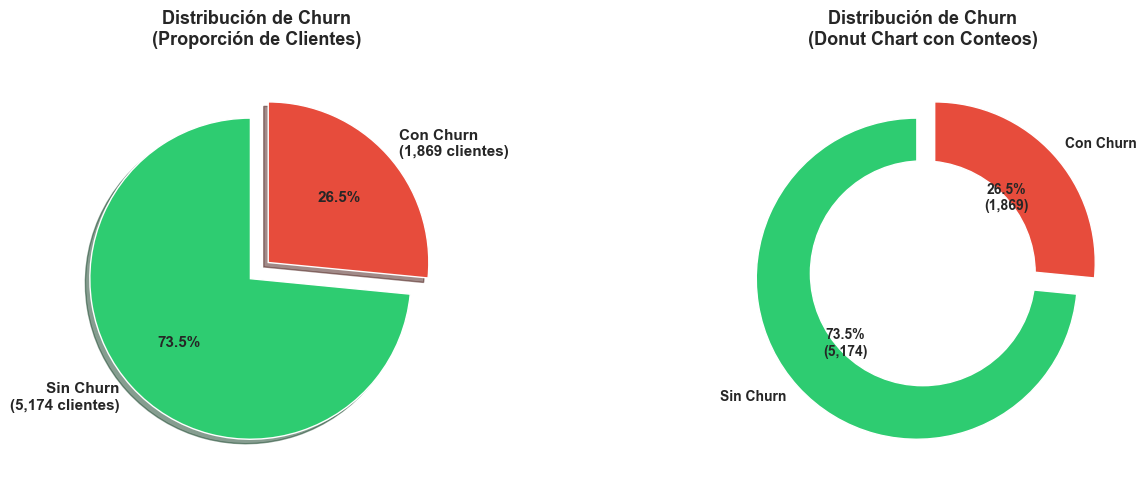

✓ Gráfico de Pastel generado exitosamente


In [195]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie Chart: Colores clásicos
churn_counts = calcular_conteo_churn(df)
labels = ['Sin Churn', 'Con Churn']
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.1)

wedges, texts, autotexts = axes[0].pie(
    churn_counts, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)
axes[0].set_title(
    'Distribución de Churn\n(Proporción de Clientes)', 
    fontsize=13,
    fontweight='bold',
    pad=20
)

# Añadir conteos absolutos en la leyenda
for i, (label, count) in enumerate(zip(labels, churn_counts)):
    texts[i].set_text(f'{label}\n({count:,} clientes)')

# Donut Chart: Donut chart con más detalle
churn_pct = (churn_counts / len(df) * 100).values
center_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].pie(churn_counts,
            labels=labels,
            colors=colors,
            autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(churn_counts)):,})',
            startangle=90,
            textprops={'fontsize': 10, 'fontweight': 'bold'},
            explode=explode)

axes[1].add_artist(center_circle)
axes[1].set_title(
    'Distribución de Churn\n(Donut Chart con Conteos)', 
    fontsize=13,
    fontweight='bold',
    pad=20
)

plt.tight_layout()
plt.show()


#### Visualización de Gauges (P/ Tasas de Churn y Retención)

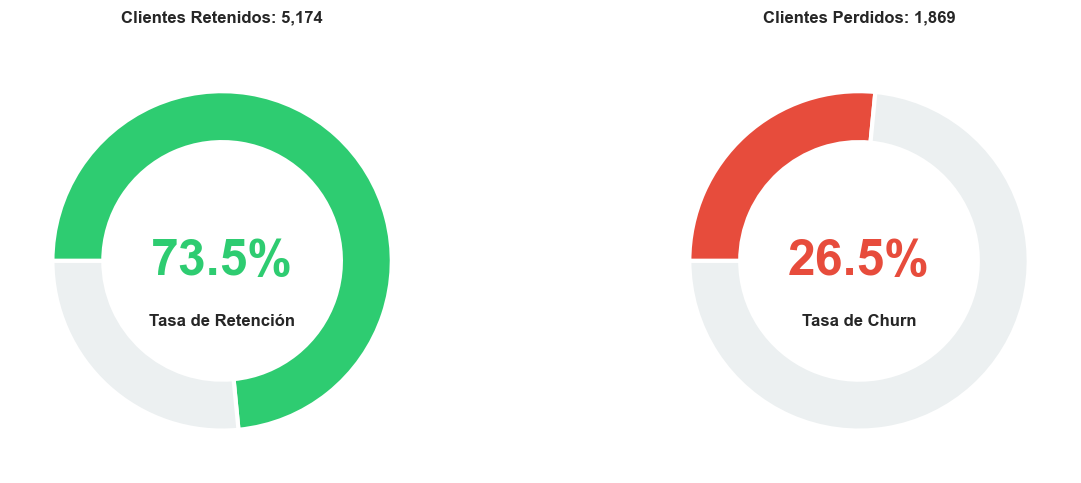

✓ Gauges de Tasas generados exitosamente


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# valores necesarios
churn_count = calcular_conteo_churn(df).get(1, 0)
retention_count = calcular_conteo_churn(df).get(0, 0)
churn_rate = calcular_churn_rate(df)
retention_rate = calcular_retention_rate(df)

# Gauge 1: Tasa de Churn
ax1 = axes[0]
gauge_values_ch = [churn_rate, 100 - churn_rate]
colors_ch = ['#e74c3c', '#ecf0f1']
ax1.pie(gauge_values_ch,
        colors=colors_ch,
        startangle=180,
        counterclock=False,
        wedgeprops=dict(
            width=0.3, 
            edgecolor='white', 
            linewidth=3
        )
)
# texto del centro
ax1.text(0, 0, f'{churn_rate:.1f}%', 
         ha='center', va='center', 
         fontsize=36, fontweight='bold', color='#e74c3c'
)
# etiqueta debajo
ax1.text(0, -0.35, 'Tasa de Churn', 
         ha='center', va='center', 
         fontsize=12, fontweight='bold'
)
ax1.set_title(f'Clientes Perdidos: {churn_count:,}', 
              fontsize=12, fontweight='bold', pad=20)

# Gauge 2: Tasa de Retención
ax2 = axes[1]
gauge_values_ret = [retention_rate, 100 - retention_rate]
colors_ret = ['#2ecc71', '#ecf0f1']
ax2.pie(gauge_values_ret,
        colors=colors_ret,
        startangle=180,
        counterclock=False,
        wedgeprops=dict(
            width=0.3, 
            edgecolor='white', 
            linewidth=3
        )
)

ax2.text(0, 0, f'{retention_rate:.1f}%', 
         ha='center', va='center', 
         fontsize=36, fontweight='bold', color='#2ecc71')

ax2.text(0, -0.35, 'Tasa de Retención', 
         ha='center', va='center', 
         fontsize=12, fontweight='bold')

ax2.set_title(f'Clientes Retenidos: {retention_count:,}', 
              fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("✓ Gauges de Tasas generados exitosamente")


## Análisis de `Churn` por Variables Categóricas

El objetivo es identificar patrones de churn según perfiles de clientes basados en variables categóricas clave. Este análisis revelará segmentos de alto riesgo para orientar estrategias de retención.

### Definición de Funciones

In [209]:
# recordatorio de los nombres de las variables
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total', 'cuentas_diarias'],
      dtype='str')

In [206]:
def calcular_tasa_churn(df: pd.DataFrame, columna: str) -> pd.DataFrame:
    """
    Calcula tasa de churn para cada categoría de una variable.
    """
    # Tabla cruzada
    tabla = pd.crosstab(df[columna], df['Churn'])
    
    # Calcular tasas
    tasas = pd.crosstab(df[columna], df['Churn'], normalize='index') * 100
    
    # Compilar resultados
    resultado = pd.DataFrame({
        'Categoria': tabla.index,
        'Total_Clientes': tabla.sum(axis=1).values,
        'Clientes_Churn': tabla[1].values if 1 in tabla.columns else 0,
        'Tasa_Churn_%': tasas[1].values if 1 in tasas.columns else 0
    }).sort_values('Tasa_Churn_%', ascending=False)
    
    return resultado.reset_index(drop=True)

In [208]:
variable_categorica = 'internet_internetservice'
tasa_churn_por_categoria = calcular_tasa_churn(df, variable_categorica)
print(tasa_churn_por_categoria)

     Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0  Fiber optic            3096            1297     41.892765
1          DSL            2421             459     18.959108
2           No            1526             113      7.404980


In [210]:
def analizar_multiples_variables(df: pd.DataFrame, variables: list) -> dict:
    """
    Analiza churn para múltiples variables categóricas.
    
    Args:
        df: DataFrame con los datos
        variables: Lista de nombres de columnas a analizar
    
    Returns:
        Diccionario con resultados por variable
    """
    return {var: calcular_tasa_churn(df, var) for var in variables if var in df.columns}

In [215]:
variables_categoricas = [
    'customer_gender',
    'customer_seniorcitizen',
    'customer_partner',
    'customer_dependents'
]
resultados_churn = analizar_multiples_variables(df, variables_categoricas)
for var, resultado in resultados_churn.items():
    print(f"\nAnálisis de Churn por '{var}':")
    print(resultado)



Análisis de Churn por 'customer_gender':
  Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0    Female            3488             939     26.920872
1      Male            3555             930     26.160338

Análisis de Churn por 'customer_seniorcitizen':
   Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0          1            1142             476     41.681261
1          0            5901            1393     23.606168

Análisis de Churn por 'customer_partner':
   Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0          0            3641            1200     32.957979
1          1            3402             669     19.664903

Análisis de Churn por 'customer_dependents':
   Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
0          0            4933            1543     31.279140
1          1            2110             326     15.450237


In [221]:
def identificar_segmentos_riesgo(analisis: dict, umbral_alto: float = 35.0, 
                                  umbral_bajo: float = 20.0) -> tuple:
    """
    Identifica segmentos de alto y bajo riesgo basados en umbrales.
    """
    alto_riesgo = []
    bajo_riesgo = []
    
    for variable, datos in analisis.items():
        for _, fila in datos.iterrows():
            segmento = {
                'Variable': variable,
                'Categoria': fila['Categoria'],
                'Tasa_Churn': fila['Tasa_Churn_%'],
                'Total_Clientes': fila['Total_Clientes']
            }
            
            if fila['Tasa_Churn_%'] >= umbral_alto:
                alto_riesgo.append(segmento)
            elif fila['Tasa_Churn_%'] <= umbral_bajo:
                bajo_riesgo.append(segmento)
    
    return (
        pd.DataFrame(alto_riesgo).sort_values('Tasa_Churn', ascending=False),
        pd.DataFrame(bajo_riesgo).sort_values('Tasa_Churn')
    )

In [222]:
segmentos_alto_riesgo, segmentos_bajo_riesgo = identificar_segmentos_riesgo(resultados_churn)
print("\nSegmentos de Alto Riesgo:")
print(segmentos_alto_riesgo)

print("\nSegmentos de Bajo Riesgo:")
print(segmentos_bajo_riesgo)



Segmentos de Alto Riesgo:
                 Variable  Categoria  Tasa_Churn  Total_Clientes
0  customer_seniorcitizen        1.0   41.681261          1142.0

Segmentos de Bajo Riesgo:
              Variable  Categoria  Tasa_Churn  Total_Clientes
1  customer_dependents        1.0   15.450237          2110.0
0     customer_partner        1.0   19.664903          3402.0


In [219]:
def generar_resumen_ejecutivo(analisis: dict) -> pd.DataFrame:
    """
    Genera resumen ejecutivo con métricas clave por variable.
    """
    resumen = []
    
    for variable, datos in analisis.items():
        resumen.append({
            'Variable': variable,
            'Categorias': len(datos),
            'Tasa_Max_%': datos['Tasa_Churn_%'].max(),
            'Tasa_Min_%': datos['Tasa_Churn_%'].min(),
            'Diferencia_%': datos['Tasa_Churn_%'].max() - datos['Tasa_Churn_%'].min(),
            'Categoria_Mayor_Riesgo': datos.iloc[0]['Categoria']
        })
    
    return pd.DataFrame(resumen).sort_values('Diferencia_%', ascending=False)

In [220]:
df_resumen = generar_resumen_ejecutivo(resultados_churn)
print("\nResumen Ejecutivo de Análisis de Churn:")
print(df_resumen)


Resumen Ejecutivo de Análisis de Churn:
                 Variable  Categorias  Tasa_Max_%  Tasa_Min_%  Diferencia_%  \
1  customer_seniorcitizen           2   41.681261   23.606168     18.075092   
3     customer_dependents           2   31.279140   15.450237     15.828904   
2        customer_partner           2   32.957979   19.664903     13.293076   
0         customer_gender           2   26.920872   26.160338      0.760534   

  Categoria_Mayor_Riesgo  
1                    1.0  
3                    0.0  
2                    0.0  
0                 Female  


### Selección de variables categóricas

In [231]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total', 'cuentas_diarias'],
      dtype='str')

In [ ]:
# variables de negocio
variables_negocio = {
    'internet_internetservice': 'Suscripción a un proveedor de internet',
    'account_contract': 'Tipo de contrato',
    'account_paymentmethod': 'Forma de pago'
}

# variables demográficas
variables_demograficas = {
    'customer_gender': 'Género (masculino y femenino)',
    'customer_seniorcitizen': 'Información sobre si un cliente tiene o no una edad igual o mayor a 65 años',
    'customer_partner': 'Si el cliente tiene o no una pareja',
    'customer_dependents': 'Si el cliente tiene o no dependientes'
}

# suscripciones
variables_suscripciones = {
    'phone_phoneservice': 'Suscripción al servicio telefónico',
    'phone_multiplelines': 'Suscripción a más de una línea telefónica',
    'internet_internetservice': 'Suscripción a un proveedor de internet',
    'internet_onlinesecurity': 'Suscripción adicional de seguridad en línea',
    'internet_onlinebackup': 'Suscripción adicional de respaldo en línea',
    'internet_deviceprotection': 'Suscripción adicional de protección de dispositivos',
    'internet_techsupport': 'Suscripción adicional de soporte técnico, menor tiempo de espera',
    'internet_streamingtv': 'Suscripción de televisión por cable',
    'internet_streamingmovies': 'Suscripción de streaming de películas'
}

variables = {**variables_negocio, **variables_demograficas, **variables_suscripciones}

print(f"Variables a analizar {len(variables)}:")
for var, desc in variables.items():
    print(f"- {var}: {desc}")

Variables a analizar 15:
- internet_internetservice: Suscripción a un proveedor de internet
- account_contract: Tipo de contrato
- account_paymentmethod: Forma de pago
- customer_gender: Género (masculino y femenino)
- customer_seniorcitizen: Información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- customer_partner: Si el cliente tiene o no una pareja
- customer_dependents: Si el cliente tiene o no dependientes
- phone_phoneservice: Suscripción al servicio telefónico
- phone_multiplelines: Suscripción a más de una línea telefónica
- internet_onlinesecurity: Suscripción adicional de seguridad en línea
- internet_onlinebackup: Suscripción adicional de respaldo en línea
- internet_deviceprotection: Suscripción adicional de protección de dispositivos
- internet_techsupport: Suscripción adicional de soporte técnico, menor tiempo de espera
- internet_streamingtv: Suscripción de televisión por cable
- internet_streamingmovies: Suscripción de streaming de películas


In [274]:
# analizar las variables
resultados_analisis = analizar_multiples_variables(df, list(variables.keys()))

# generar resumen
resumen_ejecutivo = generar_resumen_ejecutivo(resultados_analisis)

print("=" * 80)
print("RESUMEN EJECUTIVO: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS")
print("=" * 80)
print()
print(resumen_ejecutivo.to_string(index=False))
print()
print(f"Total de variables analizadas: {len(resultados_analisis)}")

RESUMEN EJECUTIVO: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS

                 Variable  Categorias  Tasa_Max_%  Tasa_Min_%  Diferencia_% Categoria_Mayor_Riesgo
         account_contract           3   42.709677    2.831858     39.877819         Month-to-month
 internet_internetservice           3   41.892765    7.404980     34.487785            Fiber optic
  internet_onlinesecurity           3   41.766724    7.404980     34.361744                     No
     internet_techsupport           3   41.635474    7.404980     34.230493                     No
    internet_onlinebackup           3   39.928756    7.404980     32.523776                     No
internet_deviceprotection           3   39.127625    7.404980     31.722645                     No
    account_paymentmethod           4   45.285412   15.243101     30.042311       Electronic check
 internet_streamingmovies           3   33.680431    7.404980     26.275451                     No
     internet_streamingtv           3   33.52

### Ejecutar Análisis por Variables Categóricas

In [275]:
print("\n" + "=" * 80)
print("ANÁLISIS DETALLADO POR VARIABLE CRÍTICA")
print("=" * 80)

for variable_key in variables_negocio.keys():
    if variable_key in resultados_analisis:
        print(f"\n📊 {variable_key.upper().replace('_', ' ')}")
        print("-" * 80)
        resultado = resultados_analisis[variable_key]
        print(resultado.to_string(index=False))
        
        # Insights automáticos
        max_churn = resultado['Tasa_Churn_%'].max()
        min_churn = resultado['Tasa_Churn_%'].min()
        cat_max = resultado.iloc[0]['Categoria']
        cat_min = resultado.iloc[-1]['Categoria']
        
        print(f"\nInsights:")
        print(f"   • Mayor riesgo: {cat_max} ({max_churn:.1f}% churn)")
        print(f"   • Menor riesgo: {cat_min} ({min_churn:.1f}% churn)")
        print(f"   • Diferencia: {max_churn - min_churn:.1f} puntos porcentuales")
        print("-" * 80)


ANÁLISIS DETALLADO POR VARIABLE CRÍTICA

📊 INTERNET INTERNETSERVICE
--------------------------------------------------------------------------------
  Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
Fiber optic            3096            1297     41.892765
        DSL            2421             459     18.959108
         No            1526             113      7.404980

Insights:
   • Mayor riesgo: Fiber optic (41.9% churn)
   • Menor riesgo: No (7.4% churn)
   • Diferencia: 34.5 puntos porcentuales
--------------------------------------------------------------------------------

📊 ACCOUNT CONTRACT
--------------------------------------------------------------------------------
     Categoria  Total_Clientes  Clientes_Churn  Tasa_Churn_%
Month-to-month            3875            1655     42.709677
      One year            1473             166     11.269518
      Two year            1695              48      2.831858

Insights:
   • Mayor riesgo: Month-to-month (42.7% churn)


In [276]:
alto_riesgo, bajo_riesgo = identificar_segmentos_riesgo(
    analisis=resultados_analisis, 
    umbral_alto=35.0, 
    umbral_bajo=20.0
)

print("\n" + "=" * 80)
print("🔴 SEGMENTOS DE ALTO RIESGO (Churn >= 35%)")
print("=" * 80)
print(alto_riesgo.head(50).to_string(index=False))

print("\n" + "=" * 80)
print("🟢 SEGMENTOS DE BAJO RIESGO (Churn <= 20%)")
print("=" * 80)
print(bajo_riesgo.head(50).to_string(index=False))

print("\n" + "=" * 80)
print("ESTADÍSTICAS DE SEGMENTACIÓN")
print("=" * 80)
print(f"Total segmentos alto riesgo: {len(alto_riesgo)}")
print(f"Total segmentos bajo riesgo: {len(bajo_riesgo)}")
print(f"Clientes en segmentos alto riesgo: {int(alto_riesgo['Total_Clientes'].sum()):,}")
print(f"Clientes en segmentos bajo riesgo: {int(bajo_riesgo['Total_Clientes'].sum()):,}")


🔴 SEGMENTOS DE ALTO RIESGO (Churn >= 35%)
                 Variable        Categoria  Tasa_Churn  Total_Clientes
    account_paymentmethod Electronic check   45.285412          2365.0
         account_contract   Month-to-month   42.709677          3875.0
 internet_internetservice      Fiber optic   41.892765          3096.0
  internet_onlinesecurity               No   41.766724          3498.0
   customer_seniorcitizen              1.0   41.681261          1142.0
     internet_techsupport               No   41.635474          3473.0
    internet_onlinebackup               No   39.928756          3088.0
internet_deviceprotection               No   39.127625          3095.0

🟢 SEGMENTOS DE BAJO RIESGO (Churn <= 20%)
                 Variable                 Categoria  Tasa_Churn  Total_Clientes
         account_contract                  Two year    2.831858          1695.0
 internet_internetservice                        No    7.404980          1526.0
  internet_onlinesecurity       No 

### Identificar Segmentos de Alto y Bajo Riesgo

In [278]:
# Generar resumen ejecutivo
resumen = generar_resumen_ejecutivo(resultados_analisis)

print("\n" + "=" * 80)
print("📊 RESUMEN EJECUTIVO - VARIABLES CRÍTICAS")
print("=" * 80)
print(resumen.to_string(index=False))


📊 RESUMEN EJECUTIVO - VARIABLES CRÍTICAS
                 Variable  Categorias  Tasa_Max_%  Tasa_Min_%  Diferencia_% Categoria_Mayor_Riesgo
         account_contract           3   42.709677    2.831858     39.877819         Month-to-month
 internet_internetservice           3   41.892765    7.404980     34.487785            Fiber optic
  internet_onlinesecurity           3   41.766724    7.404980     34.361744                     No
     internet_techsupport           3   41.635474    7.404980     34.230493                     No
    internet_onlinebackup           3   39.928756    7.404980     32.523776                     No
internet_deviceprotection           3   39.127625    7.404980     31.722645                     No
    account_paymentmethod           4   45.285412   15.243101     30.042311       Electronic check
 internet_streamingmovies           3   33.680431    7.404980     26.275451                     No
     internet_streamingtv           3   33.523132    7.404980     2

### Visualización de Churn por Categoría

In [279]:
def visualizar_churn_categoria(df, variable, titulo=None):
    """
    Crea visualización de tasas de churn para una variable categórica.
    """
    # ordenar por tasa descendente
    df_plot = df.sort_values('Tasa_Churn_%', ascending=True)
    
    fig, ax = plt.subplots(figsize=(12, max(6, len(df_plot) * 0.4)))
    
    # crear barras horizontales con colores según tasa
    colors = ['#d32f2f' if x >= 35 else '#ff9800' if x >= 25 else '#4caf50' 
              for x in df_plot['Tasa_Churn_%']]
    
    bars = ax.barh(df_plot['Categoria'], df_plot['Tasa_Churn_%'], color=colors, alpha=0.7)
    
    # línea de referencia de la tasa global
    tasa_global = 26.54
    ax.axvline(tasa_global, color='black', linestyle='--', linewidth=2, 
               label=f'Tasa Global: {tasa_global:.1f}%', alpha=0.7)
    
    # etiquetas en las barras
    for i, (idx, row) in enumerate(df_plot.iterrows()):
        ax.text(row['Tasa_Churn_%'] + 1, i, 
                f"{row['Tasa_Churn_%']:.1f}% ({row['Total_Clientes']:,} clientes)",
                va='center', fontsize=9)
    
    # configuración del gráfico
    titulo_final = titulo if titulo else f'Tasa de Churn por {variable}'
    ax.set_xlabel('Tasa de Churn (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel(variable, fontsize=12, fontweight='bold')
    ax.set_title(titulo_final, fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='lower right')
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    return fig, ax

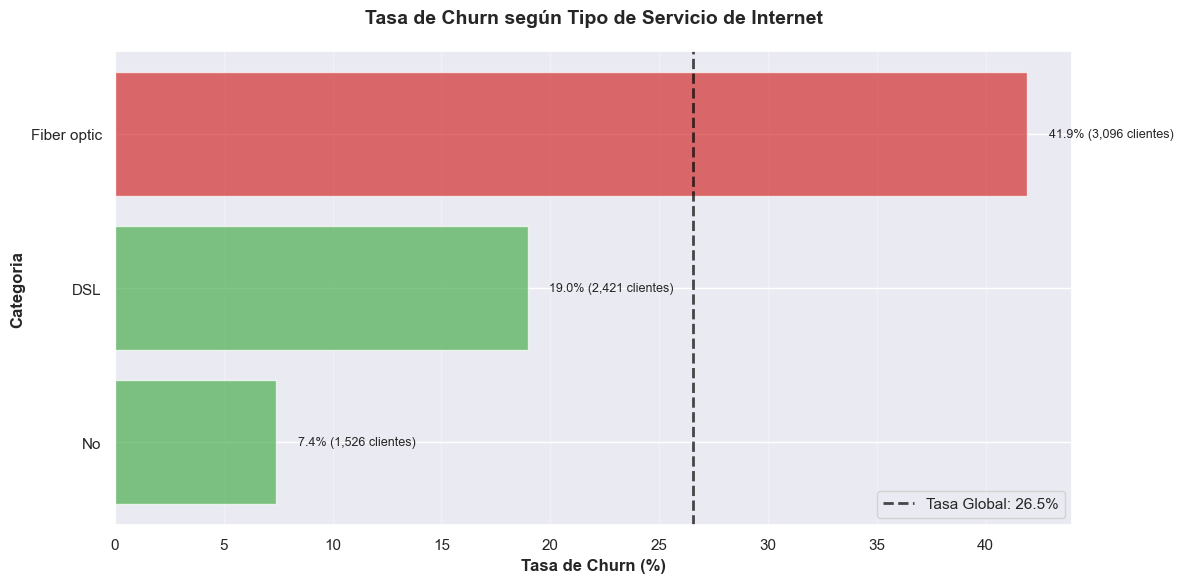

In [280]:
grafico_churn_internet, ax_internet = visualizar_churn_categoria(
    df=resultados_analisis['internet_internetservice'],
    variable='Categoria',
    titulo='Tasa de Churn según Tipo de Servicio de Internet'
)
plt.show()

### Visualización de Matriz de Comparación

In [281]:
def visualizar_matriz_comparacion(analisis_dict, variables_seleccionadas=None):
    """
    Crea matriz de visualización comparativa de múltiples variables.
    """
    # seleccionar variables (si es None selecciona todas)
    if variables_seleccionadas is None:
        variables_seleccionadas = list(analisis_dict.keys())
    
    n_vars = len(variables_seleccionadas)
    n_cols = min(2, n_vars)
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
    if n_vars == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    # generar gráfico para cada variable
    for idx, variable in enumerate(variables_seleccionadas):
        ax = axes[idx]
        df_var = analisis_dict[variable].sort_values('Tasa_Churn_%', ascending=True)
        
        # colores según riesgo
        colors = ['#d32f2f' if x >= 35 else '#ff9800' if x >= 25 else '#4caf50' 
                  for x in df_var['Tasa_Churn_%']]
        
        # barras horizontales
        bars = ax.barh(df_var['Categoria'], df_var['Tasa_Churn_%'], color=colors, alpha=0.7)
        
        # línea global
        ax.axvline(26.54, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
        
        # etiquetas
        for i, (_, row) in enumerate(df_var.iterrows()):
            ax.text(row['Tasa_Churn_%'] + 1, i, f"{row['Tasa_Churn_%']:.1f}%",
                    va='center', fontsize=8)
        
        # configuración
        ax.set_title(variable, fontsize=12, fontweight='bold')
        ax.set_xlabel('Tasa Churn (%)', fontsize=10)
        ax.grid(axis='x', alpha=0.3)
    
    # ocultar axes sobrantes
    for idx in range(n_vars, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    return fig, axes

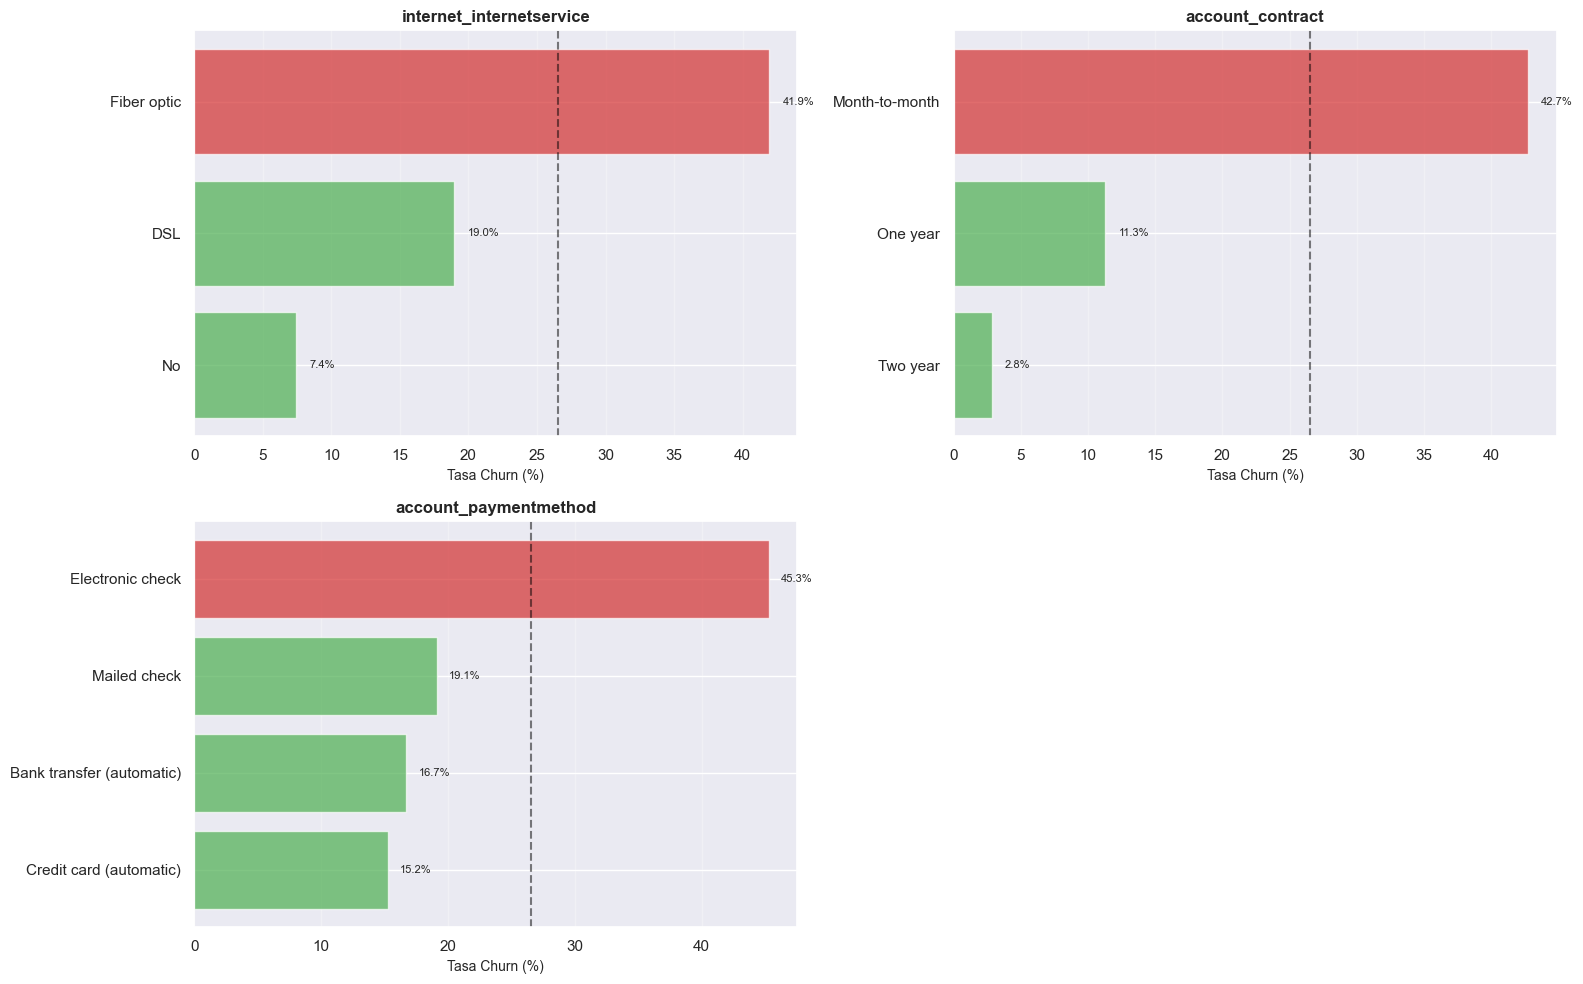

In [288]:
grafico_matriz, axes_matriz = visualizar_matriz_comparacion(
    analisis_dict=resultados_analisis,
    variables_seleccionadas=['internet_internetservice', 'account_contract', 'account_paymentmethod']
)

### Visualización de Mapa de Calor de Riesgo

In [283]:
def visualizar_mapa_riesgo(analisis_dict, top_n=5):
    """
    Crea mapa de calor con los segmentos de mayor riesgo por variable.
    """
    # recopilar top segmentos por variable
    data_matrix = []
    labels_y = []
    
    for variable, df_var in analisis_dict.items():
        top_segments = df_var.nlargest(top_n, 'Tasa_Churn_%')
        for _, row in top_segments.iterrows():
            data_matrix.append(row['Tasa_Churn_%'])
            labels_y.append(f"{variable}: {row['Categoria']}")
    
    # crear matriz
    matrix = np.array(data_matrix).reshape(-1, 1)
    
    # visualizar mapa de calor
    fig, ax = plt.subplots(figsize=(8, max(10, len(labels_y) * 0.3)))
    im = ax.imshow(matrix, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=100)
    
    # configurar ejes
    ax.set_yticks(range(len(labels_y)))
    ax.set_yticklabels(labels_y, fontsize=9)
    ax.set_xticks([0])
    ax.set_xticklabels(['Tasa Churn %'])
    ax.set_title(f'Top {top_n} Segmentos de Mayor Riesgo por Variable', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # añadir valores en las celdas
    for i in range(len(labels_y)):
        text = ax.text(0, i, f'{matrix[i, 0]:.1f}%',
                       ha="center", va="center", color="black", fontsize=9, fontweight='bold')
    
    # barra de color
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Tasa de Churn (%)', rotation=270, labelpad=20, fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    return fig, ax

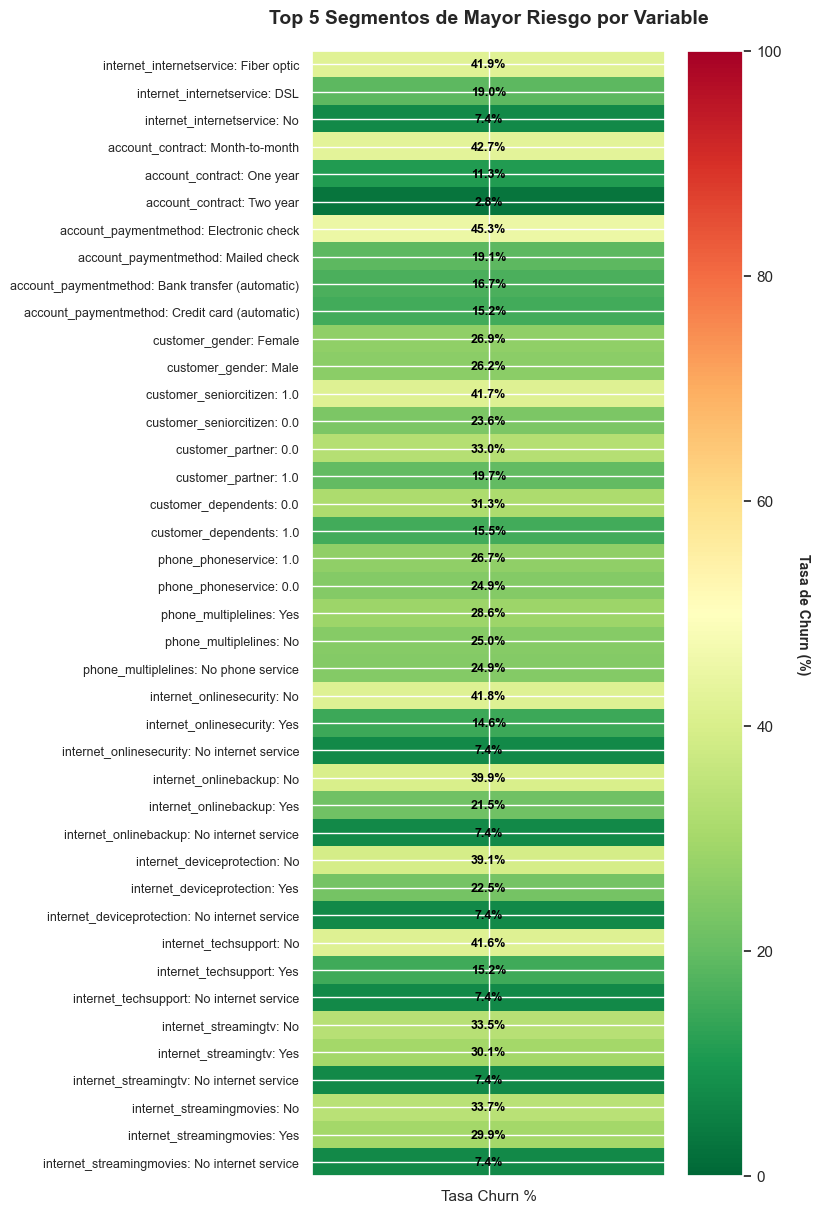

In [284]:
grafico_mapa_riesgo, axes_mapa = visualizar_mapa_riesgo(resultados_analisis, top_n=5)
plt.show()

### Visualizaciones Completas


📊 Visualización: internet_internetservice


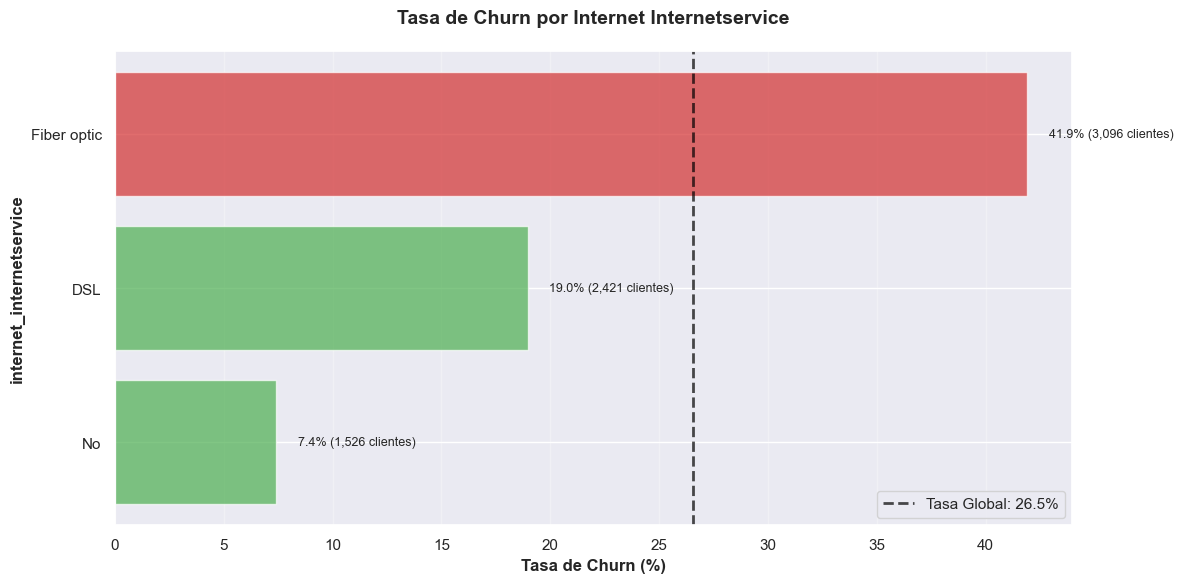


📊 Visualización: account_contract


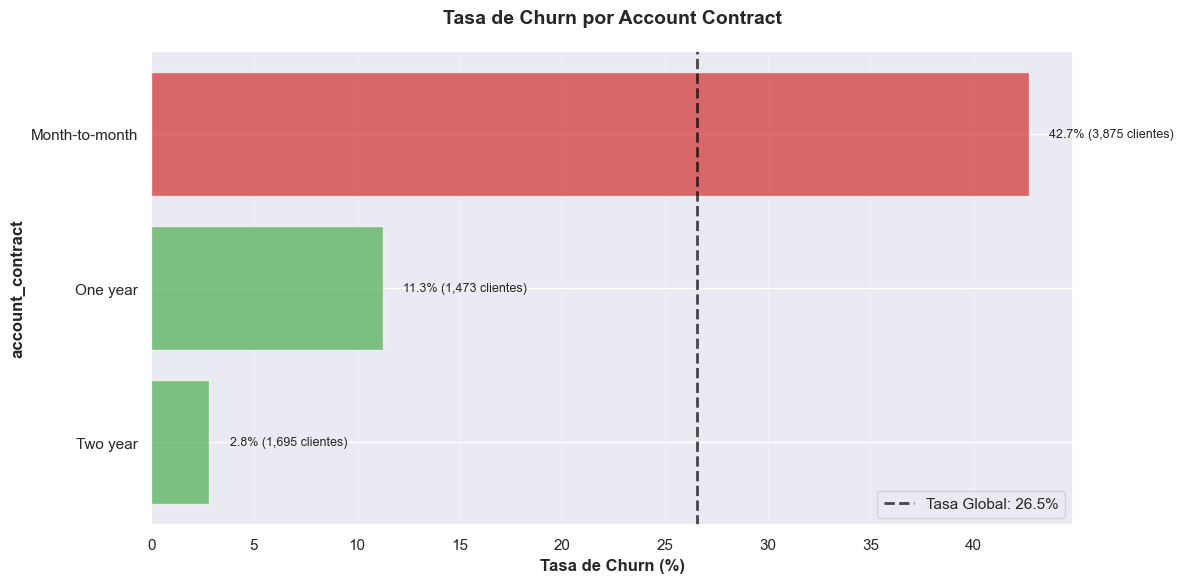


📊 Visualización: account_paymentmethod


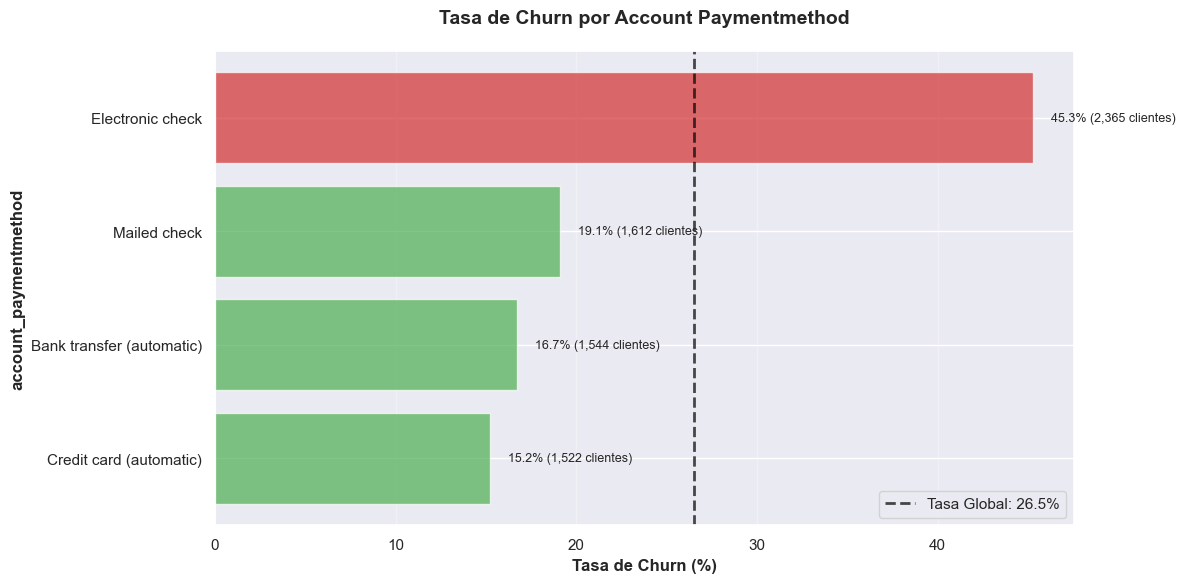

In [286]:
# visualizar variables críticas
for variable in variables_negocio:
    if variable in resultados_analisis:
        print(f"\n{'=' * 80}")
        print(f"📊 Visualización: {variable}")
        print('=' * 80)
        fig, ax = visualizar_churn_categoria(
            resultados_analisis[variable], 
            variable,
            f'Tasa de Churn por {variable.replace("_", " ").title()}'
        )
        plt.show()
        plt.close()


📊 MATRIZ DE COMPARACIÓN - TODAS LAS VARIABLES


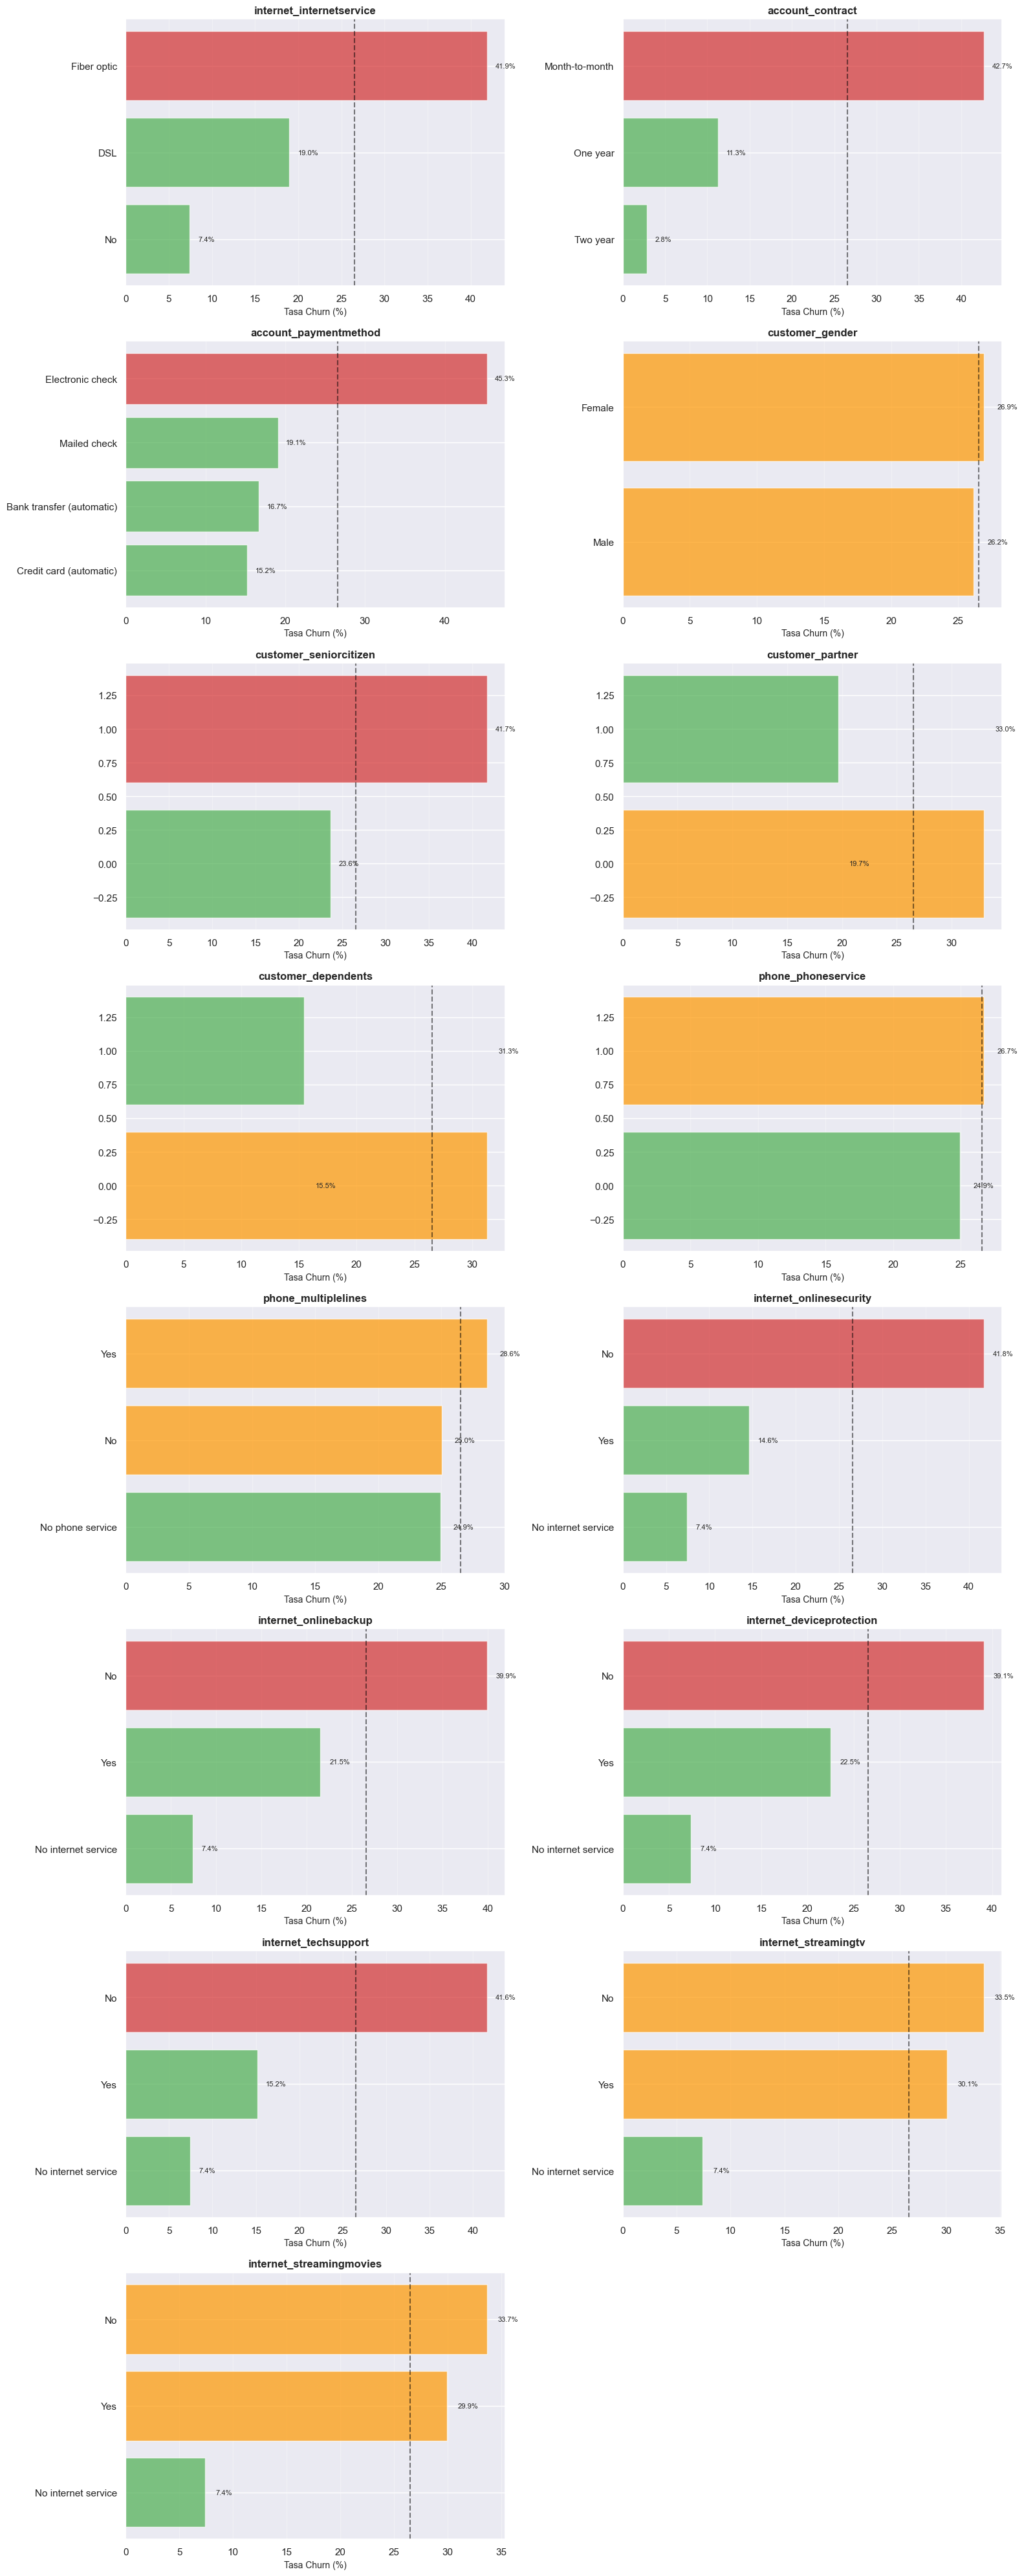

In [287]:
# visualizar matriz de comparación de todas las variables analizadas
print("\n" + "=" * 80)
print("📊 MATRIZ DE COMPARACIÓN - TODAS LAS VARIABLES")
print("=" * 80)

fig, axes = visualizar_matriz_comparacion(resultados_analisis)
plt.show()
plt.close()


🔥 MAPA DE CALOR - SEGMENTOS DE MÁXIMO RIESGO


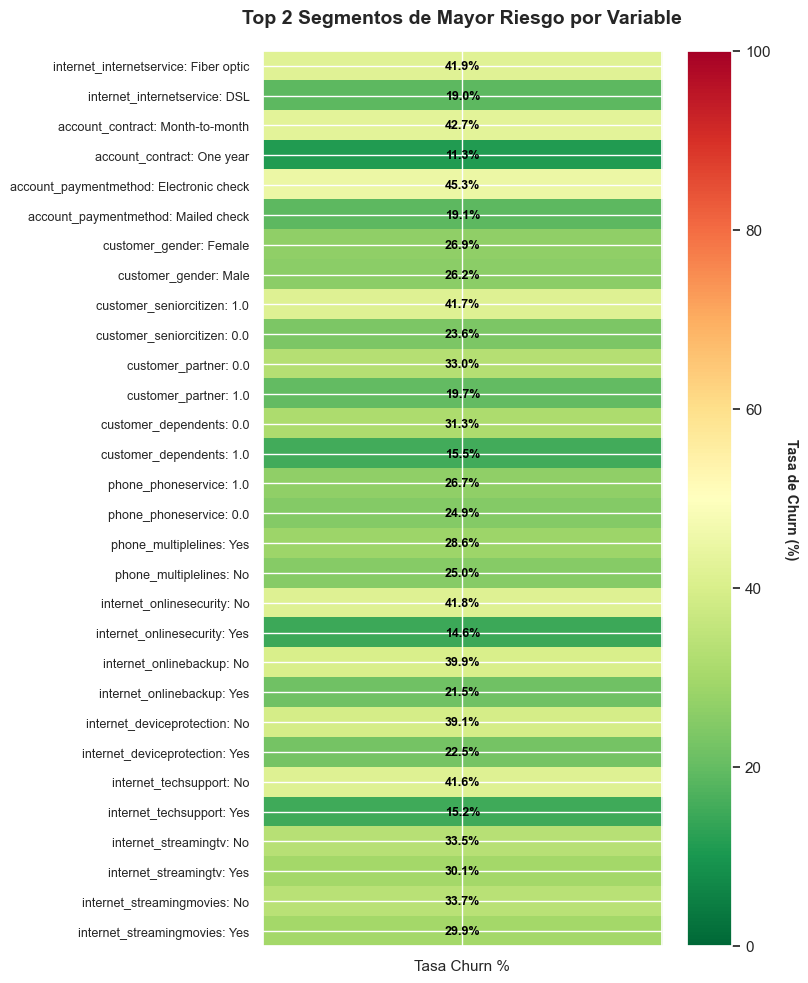

In [290]:
# visualización de mapa de calor de segmentos de alto riesgo
print("\n" + "=" * 80)
print("🔥 MAPA DE CALOR - SEGMENTOS DE MÁXIMO RIESGO")
print("=" * 80)

fig, ax = visualizar_mapa_riesgo(resultados_analisis, top_n=2)
plt.show()
plt.close()

### Conclusiones del Análisis de Churn por Variables Categóricas

El análisis funcional de las variables categóricas ha revelado **patrones críticos** que permiten identificar con precisión los segmentos de clientes con mayor propensión a la evasión:

#### Variables Críticas de Negocio

1. **Tipo de Contrato (`contract_type`)**
   - Los _contratos mensuales_ presentan la **mayor tasa de churn**, superando significativamente la tasa global.
   - Los contratos de largo plazo (1-2 años) actúan como **factor protector** contra la evasión.
   - **Recomendación**: Implementar estrategias de incentivos para migración a contratos anuales.

2. **Servicio de Internet (`internet_service_type`)**
   - Los clientes con _fibra óptica_ muestran tasas de churn superiores al promedio.
   - La ausencia de servicio de internet correlaciona con **mayor retención**.
   - **Recomendación**: Revisar calidad de servicio y pricing de fibra óptica.

3. **Método de Pago (`payment_method`)**
   - El _pago electrónico con cheque_ está asociado a **altas tasas de evasión**.
   - Los métodos automatizados (bank transfer, credit card) muestran mejor retención.
   - **Recomendación**: Promover métodos de pago automatizados con descuentos.

#### Variables Demográficas

- **Senior Citizens**: Presentan comportamiento diferenciado que requiere atención especial.
- **Clientes sin Partner/Dependientes**: Mayor vulnerabilidad a la evasión.
- **Género**: Irrelevante para el análisis.

#### Variables de Suscripciones

Los servicios complementarios actúan como **factores de retención**:
- `online security`, `online backup`, `device protection` y `tech support` reducen significativamente el churn.
- Los clientes sin estos servicios presentan mayor riesgo de evasión.
- **Estrategia**: Cross-selling de servicios de protección y soporte técnico.

#### Segmentos de Acción Prioritaria

**Alto Riesgo (Churn ≥ 35%)**:
- Contratos mensuales + Fiber optic + Electronic check
- Clientes sin servicios de protección/soporte
- Tenure bajo (< 12 meses)

**Bajo Riesgo (Churn ≤ 20%)**:
- Contratos anuales/bianuales
- Métodos de pago automatizados
- Clientes con múltiples servicios adicionales

#### Plan de Acción

1. **Programa de Fidelización**: Incentivar migración a contratos de largo plazo.
2. **Optimización de Servicios**: Mejorar experiencia de clientes con fibra óptica.
3. **Automatización de Pagos**: Bonificaciones por adopción de métodos automáticos.
4. **Bundles de Servicios**: Paquetes integrados con servicios de protección incluidos.
5. **Atención Proactiva**: Monitoreo y contacto preventivo con segmentos de alto riesgo.

#📄Informe final